# Example notebook for **QSO** HOD

## Halo Occupation Distribution (HOD) Model

This documentation describes the standard 5-parameter HOD model commonly used to model the distribution of **galaxies** within dark matter halos.

The total mean number of galaxies in a halo of mass $ M $ is:

$$
\langle N_{\text{gal}}(M) \rangle = \langle N_{\text{cen}}(M) \rangle + \langle N_{\text{sat}}(M) \rangle
$$

---

### Central Galaxy Occupation

The expected number of central galaxies in a halo of mass $ M $ is modeled as:

$
\langle N_{\text{cen}}(M) \rangle = \frac{1}{2} \left[ 1 + \mathrm{erf} \left( \frac{\log_{10} M - \log_{10} M_{\text{min}}}{\sigma_{\log M}} \right) \right]
$

- $ M$: Halo mass
- $ M_{\text{min}} $: Characteristic minimum halo mass for a central galaxy 
- $ \sigma_{\log M} $: Width of the transition in central occupation  

---

### Satellite Galaxy Occupation

The expected number of satellite galaxies is given by a power law, modulated by the central occupation:

$$
\langle N_{\text{sat}}(M) \rangle =
\begin{cases}
\left( \frac{M - M_0}{M_1} \right)^\alpha, & \text{if } M > M_0 \\
0, & \text{otherwise}
\end{cases}
$$

- $ M_0 $: Mass threshold below which no satellites form  
- $ M_1 $: Characteristic mass scale for hosting one satellite galaxy  
- $ \alpha $: Power-law slope for satellite occupation

---


In [1]:
# Initiate the HOD instance with parameter file test_fit_param.yaml
from HODDIES import HOD
import yaml
import numpy as np


In [2]:
z_sims=[0.95, 1.25, 1.55, 1.85]

for z_sim in z_sims:
    args = yaml.load(open('test_fit_param_QSO.yaml'), Loader=yaml.FullLoader)
    result_fit = np.load(f'fit_result_QSO_SHOD_6p_AbacusSummit_highbase_c000_ph100_z{z_sim}_wp+xi.npy', allow_pickle=True).item()['x']   
    dic_bf = dict(zip(args['fit_param']['priors']['QSO'].keys(), result_fit)) 
    print(f"Best fit param QSO z{z_sim}: ", dic_bf)


Best fit param QSO z0.95:  {'M_0': 11.931191586937622, 'M_1': 13.29019629191318, 'alpha': 0.8439495762580389, 'f_sigv': 0.9873454258613763, 'log_Mcent': 12.17244123156686, 'sigma_M': 0.3733155051135403}
Best fit param QSO z1.25:  {'M_0': 11.92601919166224, 'M_1': 13.475322029765445, 'alpha': 0.6181257920340089, 'f_sigv': 1.295450223758282, 'log_Mcent': 12.080436548174987, 'sigma_M': 0.1385840418146017}
Best fit param QSO z1.55:  {'M_0': 12.096366372266882, 'M_1': 13.14007197043184, 'alpha': 0.9369598543009647, 'f_sigv': 1.9110456505677076, 'log_Mcent': 12.181280075007548, 'sigma_M': 0.3819946434202738}
Best fit param QSO z1.85:  {'M_0': 12.119048551384598, 'M_1': 12.607021808934622, 'alpha': 0.8088637624523848, 'f_sigv': 2.979764818417207, 'log_Mcent': 11.907085236764985, 'sigma_M': 0.12640357123216267}


Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:15
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:16
Initialize Abacus c000 cosmology
Load data vector for QSO
Load rppi measurements at z0.8-1.1 for QSO...
Load smu measurements at z0.8-1.1 for QSO...
Best fit point: ('M_0_QSO', 11.931191586937622) ('M_1_QSO', 13.29019629191318) ('alpha_QSO', 0.8439495762580389) ('f_sigv_QSO', 0.9873454258613763) ('log_Mcent_QSO', 12.17244123156686) ('sigma_M_QSO', 0.3733155051135403)
Create mock catalog for ['QSO']
Run HOD for QSO
Set density to 0.0005 gal/Mpc/h
HOD Computed 0.4253993034362793
Start satellite assignement
Satellite assignement done 0.08750653266906738
QSO mock catalogue done 0.1479034423828125
410212 central galaxies, 89168 satellites, fraction of satellite 0.18 
Done overall time  QSO 1.0909171104431152
{'HOD_model': 'SHOD', 'Ac':

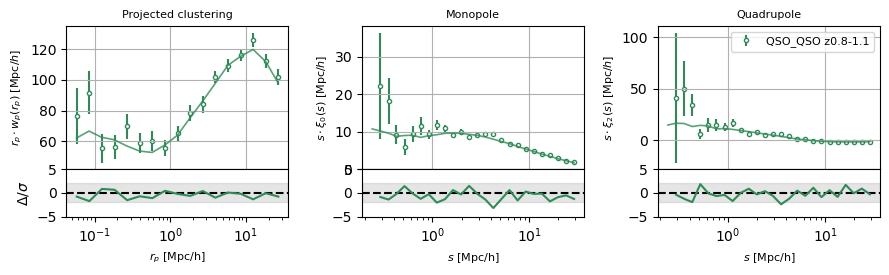

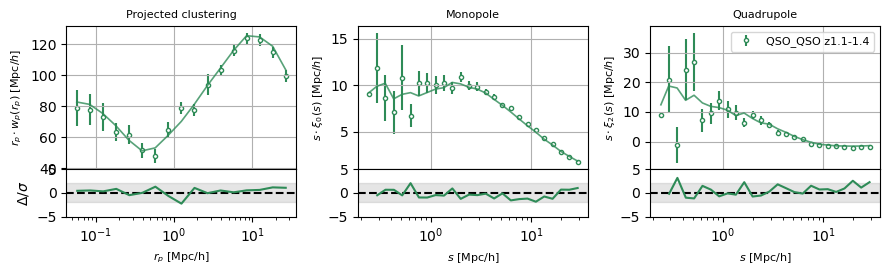

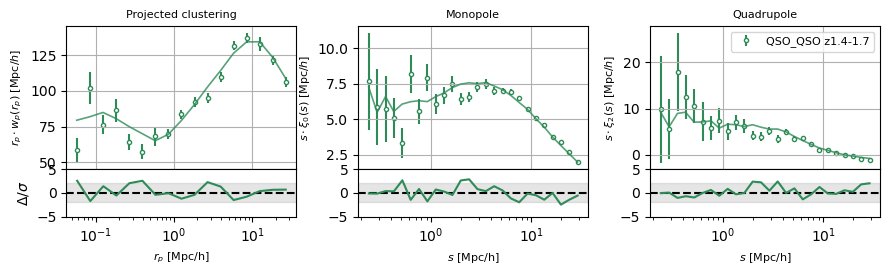

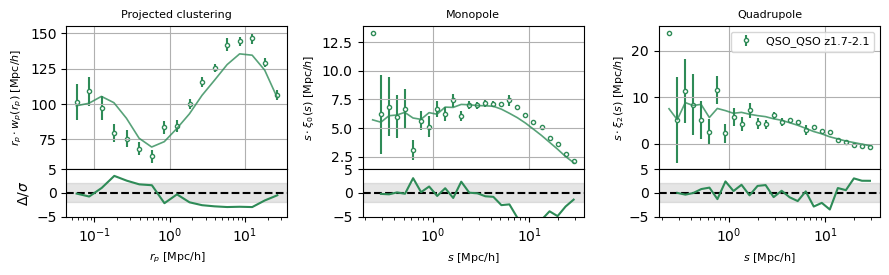

In [8]:
get_mock_cat = True
z_sims=[0.95, 1.25, 1.55, 1.85]
qso_cat = {}


for z_sim in z_sims:

    # You can change the sim_name to change simulation box
    HOD_obj= HOD(path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', param_file='test_fit_param_QSO.yaml', hcat = {'Abacus':{'sim_name':'AbacusSummit_highbase_c000_ph100', 'z_simu': z_sim}})

    HOD_obj.args['fit_param']['zmin']= 0.8 if z_sim ==0.95 else 1.1 if z_sim ==1.25 else 1.4 if z_sim ==1.55 else 1.7
    HOD_obj.args['fit_param']['zmax']= 1.1 if z_sim ==0.95 else 1.4 if z_sim ==1.25 else 1.7 if z_sim ==1.55 else 2.1

    #To add redhsift errors
    HOD_obj.args['QSO']['vsmear'] = [HOD_obj.args['fit_param']['zmin'], HOD_obj.args['fit_param']['zmax']]


    fig = HOD_obj.plot_bf_data(bf_file=f'fit_result_QSO_SHOD_6p_AbacusSummit_highbase_c000_ph100_z{z_sim}_wp+xi.npy', fix_seed=10)

    if get_mock_cat:
        print(HOD_obj.args['QSO'])
        dic_bf = dict(zip(HOD_obj.args['fit_param']['priors']['QSO'].keys(), HOD_obj.result_fit['x'])) 
        HOD_obj.args['QSO'].update(dic_bf)
        qso_cat[f'z{z_sim}'] = HOD_obj.make_mock_cat(fix_seed=10)
        qso_cat[f'z{z_sim}']['vsmear'] = HOD_obj.get_vsmear('QSO', qso_cat[f'z{z_sim}'].size)
        qso_cat[f'z{z_sim}'].write('/pscratch/sd/a/arocher/Y3_hod_fits/QSO/catalog_QSO_fit_z0.95_w_vsmear.h5')

In [ ]:
z_sims=[0.95, 1.25, 1.55, 1.85]


{'z0.95': Catalog(csize=499380, size=499380, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 'z1.25': Catalog(csize=500379, size=500379, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 'z1.55': Catalog(csize=501266, size=501266, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 'z1.85': Catalog(csize=500235, size=500235, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])}

In [13]:

qso_cat['z1.85'].write('/pscratch/sd/a/arocher/Y3_hod_fits/QSO/catalog_QSO_fit_z1.85_w_vsmear.fits')